#Building a Predicting Model using Logistic Regression Algorithm 

#1)Data Upload and Libraries installations

In [1]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=3286f21f3374f6ad3703ebb25e6a60db9ab1f6109f3a16ed6e38eb7d8c1792e8
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive


In [2]:
#Import More Library Files
!apt-get -qq install -y 
!pip install libarchive-dev && 
!pip install U libarchive
!apt-get -qq install -y graphviz && 
!pip install pydot
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats
from IPython.display import display, Image, HTML, Audio, Video
import missingno as msno
from datetime import date
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', None)
# https://pypi.python.org/pypi/pydot

import pydot

/bin/bash: -c: line 1: syntax error: unexpected end of file
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement U (from versions: none)
ERROR: No matching distribution found for U
/bin/bash: -c: line 1: syntax error: unexpected end of file
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Import data set from device storage.
from google.colab import files
uploaded = files.upload()

Saving Diabetes Data Set.csv to Diabetes Data Set.csv


#2) EDA Process

In [4]:
#View Data frame imported
df = pd.read_csv('Diabetes Data Set.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0 33.60   
1              1       85             66             29        0 26.60   
2              8      183             64              0        0 23.30   
3              1       89             66             23       94 28.10   
4              0      137             40             35      168 43.10   
5              5      116             74              0        0 25.60   
6              3       78             50             32       88 31.00   
7             10      115              0              0        0 35.30   
8              2      197             70             45      543 30.50   
9              8      125             96              0        0  0.00   
10             4      110             92              0        0 37.60   
11            10      168             74              0        0 38.00   
12            10      139             80              0        0 27.10   
13             1      189             60             23      846 30.10   
14             5      166             72             19      175 25.80   
15             7      100              0              0        0 30.00   
16             0      118             84             47      230 45.80   
17             7      107             74              0        0 29.60   
18             1      103             30             38       83 43.30   
19             1      115             70             30       96 34.60   
20             3      126             88             41      235 39.30   
21             8       99             84              0        0 35.40   
22             7      196             90              0        0 39.80   
23             9      119             80             35        0 29.00   
24            11      143             94             33      146 36.60   
25            10      125             70             26      115 31.10   
26             7      147             76              0        0 39.40   
27             1       97             66             15      140 23.20   
28            13      145             82             19      110 22.20   
29             5      117             92              0        0 34.10   
30             5      109             75             26        0 36.00   
31             3      158             76             36      245 31.60   
32             3       88             58             11       54 24.80   
33             6       92             92              0        0 19.90   
34            10      122             78             31        0 27.60   
35             4      103             60             33      192 24.00   
36            11      138             76              0        0 33.20   
37             9      102             76             37        0 32.90   
38             2       90             68             42        0 38.20   
39             4      111             72             47      207 37.10   
40             3      180             64             25       70 34.00   
41             7      133             84              0        0 40.20   
42             7      106             92             18        0 22.70   
43             9      171            110             24      240 45.40   
44             7      159             64              0        0 27.40   
45             0      180             66             39        0 42.00   
46             1      146             56              0        0 29.70   
47             2       71             70             27        0 28.00   
48             7      103             66             32        0 39.10   
49             7      105              0              0        0  0.00   
50             1      103             80             11       82 19.40   
51             1      101             50             15       36 24.20   
52             5       88             66             21       23 24.40   
53       

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0 33.60   
1            1       85             66             29        0 26.60   
2            8      183             64              0        0 23.30   
3            1       89             66             23       94 28.10   
4            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1

In [6]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180 32.90   
764            2      122             70             27        0 36.80   
765            5      121             72             23      112 26.20   
766            1      126             60              0        0 30.10   
767            1       93             70             31        0 30.40   

     DiabetesPedigreeFunction  Age  Outcome  
763                      0.17   63        0  
764                      0.34   27        0  
765                      0.24   30        0  
766                      0.35   47        1  
767                      0.32   23        0

In [7]:
#Check the structure of the data frame
df.shape

(768, 9)

In [8]:
#Check the variable column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#Describtion of the central tendency and dispersion of the numerical values of the Data Frame 
df.describe()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          20.54    79.80  31.99   
std           3.37    31.97          19.36          15.95   115.24   7.88   
min           0.00     0.00           0.00           0.00     0.00   0.00   
25%           1.00    99.00          62.00           0.00     0.00  27.30   
50%           3.00   117.00          72.00          23.00    30.50  32.00   
75%           6.00   140.25          80.00          32.00   127.25  36.60   
max          17.00   199.00         122.00          99.00   846.00  67.10   

       DiabetesPedigreeFunction    Age  Outcome  
count                    768.00 768.00   768.00  
mean                       0.47  33.24     0.35  
std                        0.33  11.76     0.48  
min                        0.08  21.00     0.00  
25%                        0.24  24.00     0.00  
50%                        0.37  29.00     0.00  
75%                        0.63  41.00     1.00  
max                        2.42  81.00     1.00

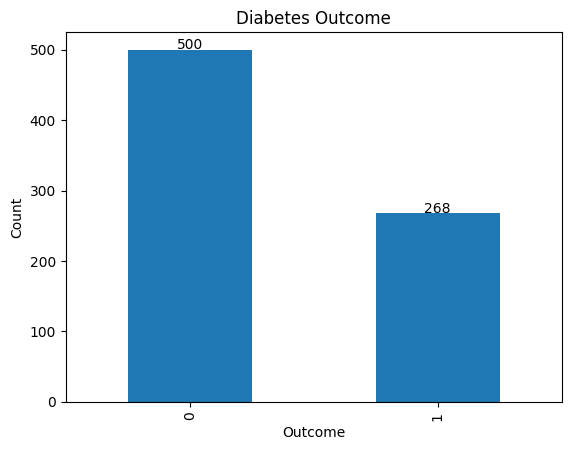

<Figure size 640x480 with 0 Axes>

In [10]:
#GET THE UNIQUE COUNT OF VALUES IN THE OUTPUT(OUTCOME) COLUMN
# get value counts and plot
vc = df['Outcome'].value_counts()
ax = vc.plot(kind='bar')

# loop through bars and append count values to labels
for i, v in enumerate(vc):
    ax.text(i, v+1, str(v), ha='center')

# set plot title and axis labels
plt.title('Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')

# display plot
plt.show()
# Tag the plot with a number
display(HTML('<h2>Plot 2.1</h2>'))
display(plt.gcf().canvas)

0 Represents Probability a person would Not have Diabetic; 
1 Represents Probability a person would have Diabetic

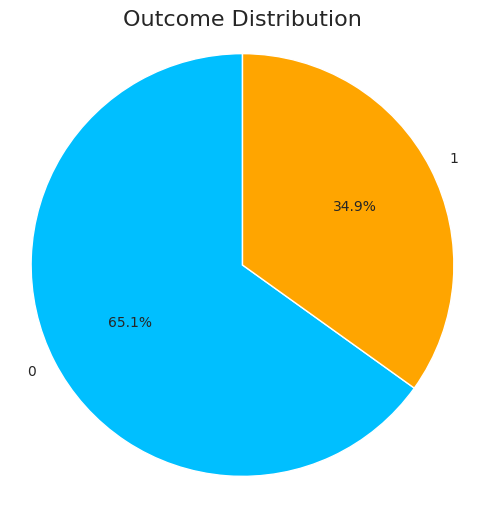

0    500
1    268
Name: Outcome, dtype: int64


<Figure size 640x480 with 0 Axes>

In [11]:
counts = df['Outcome'].value_counts()
labels = ['0', '1']
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#00BFFF', '#FFA500'])
plt.title("Outcome Distribution", fontsize=16)
plt.axis('equal')
plt.show()
print(df.Outcome.value_counts())

# Tag the plot with a number
display(HTML('<h2>Plot 2.2</h2>'))
display(plt.gcf().canvas)

In [12]:
#CHECK AND SHOW THE MEAN VALUE OF EACH OUTPUT VALUE
df.groupby(['Outcome']).mean()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0               3.30   109.98          68.18          19.66    68.79 30.30   
1               4.87   141.26          70.82          22.16   100.34 35.14   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                            0.43 31.19  
1                            0.55 37.07

In [13]:
#Show Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#3) DATA CLEANINGS

Manual inspecting the SkinThinkness and Insulin columns, show some zero values, which can't in reality be zero, so I replace each zero with the mean value below:

In [14]:
#Check for Null values 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###For SkinThickness!

In [15]:
#Replacing the zero values of SkinThinkness with the mean value
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72          35.00        0 33.60   
1              1       85             66          29.00        0 26.60   
2              8      183             64          20.54        0 23.30   
3              1       89             66          23.00       94 28.10   
4              0      137             40          35.00      168 43.10   
5              5      116             74          20.54        0 25.60   
6              3       78             50          32.00       88 31.00   
7             10      115              0          20.54        0 35.30   
8              2      197             70          45.00      543 30.50   
9              8      125             96          20.54        0  0.00   
10             4      110             92          20.54        0 37.60   
11            10      168             74          20.54        0 38.00   
12            10      139             80          20.54        0 27.10   
13             1      189             60          23.00      846 30.10   
14             5      166             72          19.00      175 25.80   
15             7      100              0          20.54        0 30.00   
16             0      118             84          47.00      230 45.80   
17             7      107             74          20.54        0 29.60   
18             1      103             30          38.00       83 43.30   
19             1      115             70          30.00       96 34.60   
20             3      126             88          41.00      235 39.30   
21             8       99             84          20.54        0 35.40   
22             7      196             90          20.54        0 39.80   
23             9      119             80          35.00        0 29.00   
24            11      143             94          33.00      146 36.60   
25            10      125             70          26.00      115 31.10   
26             7      147             76          20.54        0 39.40   
27             1       97             66          15.00      140 23.20   
28            13      145             82          19.00      110 22.20   
29             5      117             92          20.54        0 34.10   
30             5      109             75          26.00        0 36.00   
31             3      158             76          36.00      245 31.60   
32             3       88             58          11.00       54 24.80   
33             6       92             92          20.54        0 19.90   
34            10      122             78          31.00        0 27.60   
35             4      103             60          33.00      192 24.00   
36            11      138             76          20.54        0 33.20   
37             9      102             76          37.00        0 32.90   
38             2       90             68          42.00        0 38.20   
39             4      111             72          47.00      207 37.10   
40             3      180             64          25.00       70 34.00   
41             7      133             84          20.54        0 40.20   
42             7      106             92          18.00        0 22.70   
43             9      171            110          24.00      240 45.40   
44             7      159             64          20.54        0 27.40   
45             0      180             66          39.00        0 42.00   
46             1      146             56          20.54        0 29.70   
47             2       71             70          27.00        0 28.00   
48             7      103             66          32.00        0 39.10   
49             7      105              0          20.54        0  0.00   
50             1      103             80          11.00       82 19.40   
51             1      101             50          15.00       36 24.20   
52             5       88             66          21.00       23 24.40   
53       

# For Glucose

In [16]:
#Replacing the zero values of Glucose with the mean value
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].mean())

In [17]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72          35.00    79.80 33.60   
1            1       85             66          29.00    79.80 26.60   
2            8      183             64          20.54    79.80 23.30   
3            1       89             66          23.00    94.00 28.10   
4            0      137             40          35.00   168.00 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1

#4) DATA VISUALIZATION

###To check for outliers in the Independent variable distribution

#For Pregnancy

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


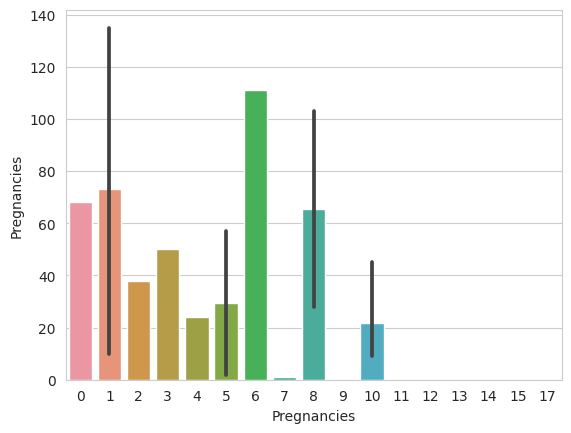

In [18]:
print(df["Pregnancies"].value_counts())
sns.barplot(data=df, x="Pregnancies", y=df.Pregnancies.value_counts())

# Tag the plot with a number
display(HTML('<h2>Plot 4.1</h2>'))
display(plt.gcf().canvas)

##Box Plot, to check for Occurrance Frequency for each default element

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-pack

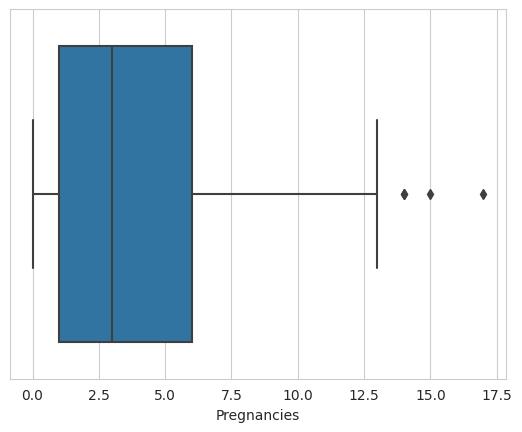

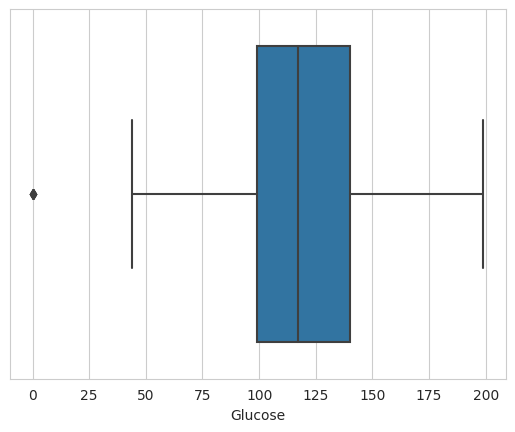

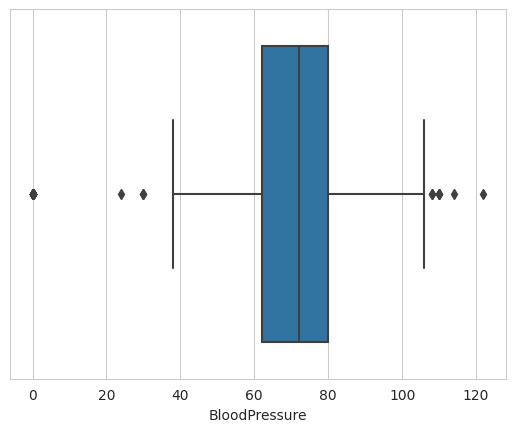

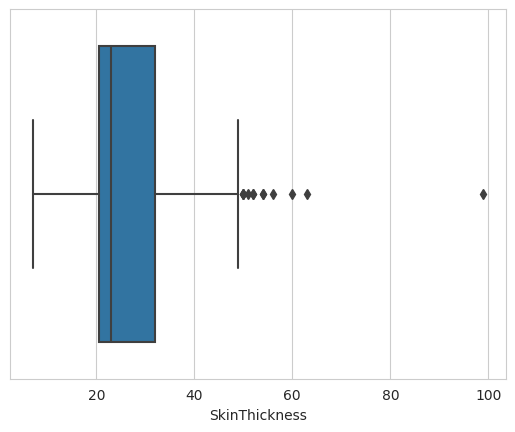

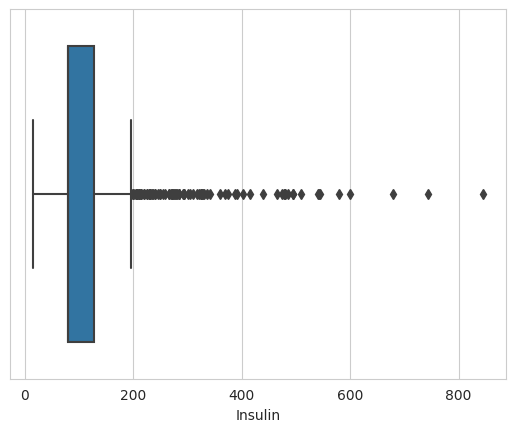

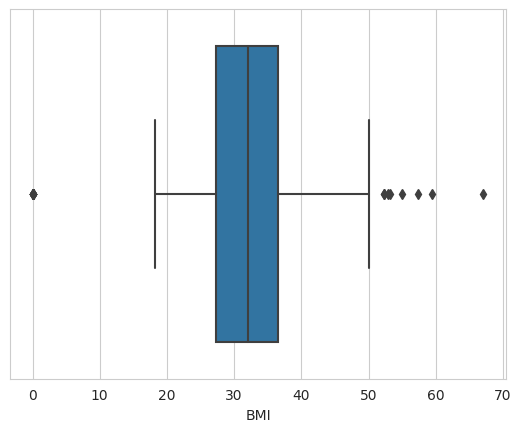

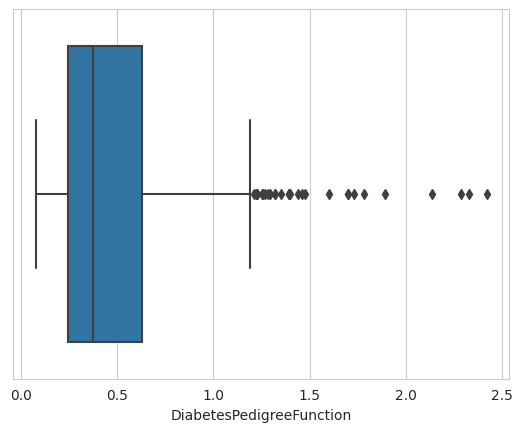

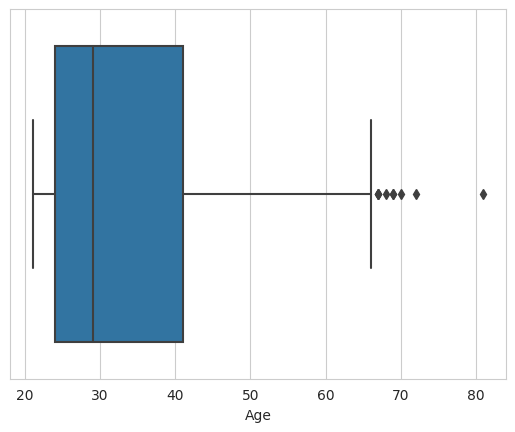

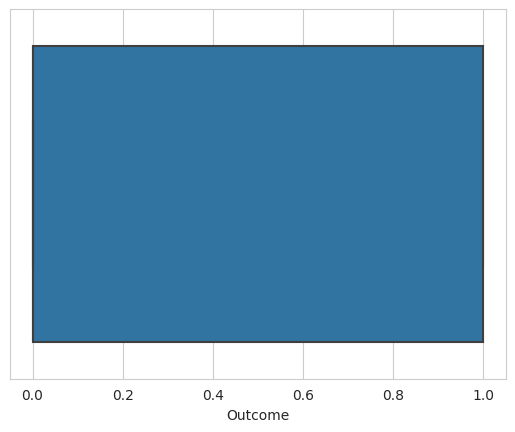

In [19]:
#Box Plot
for c in df.columns:
    plt.figure()
    sns.boxplot(x = c, data = df, orient = "v")

    # Tag the plot with a number
display(HTML('<h2>Plot 4.2 to 4.10</h2>'))
display(plt.gcf().canvas)

##For Glucose Level

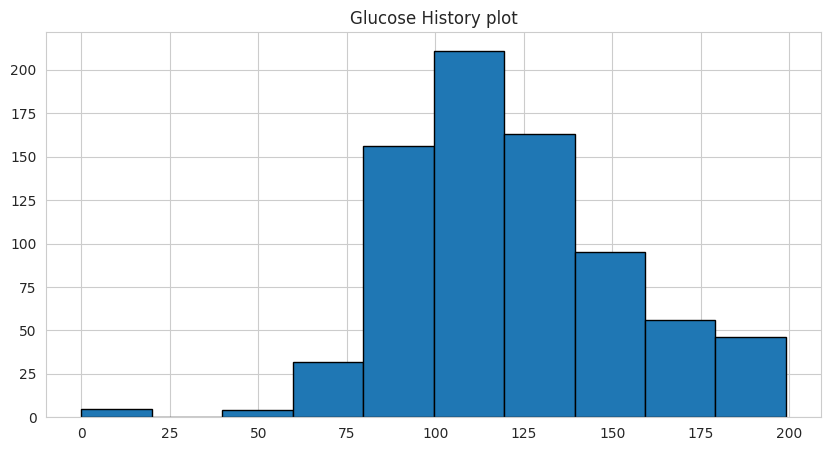

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure (figsize = (10,5))
plt.hist("Glucose", data=df, edgecolor = "k")
plt.title("Glucose History plot")
plt.show()

# Tag the plot with a number
display(HTML('<h2>Plot 4.11</h2>'))
display(plt.gcf().canvas)

##For BMI

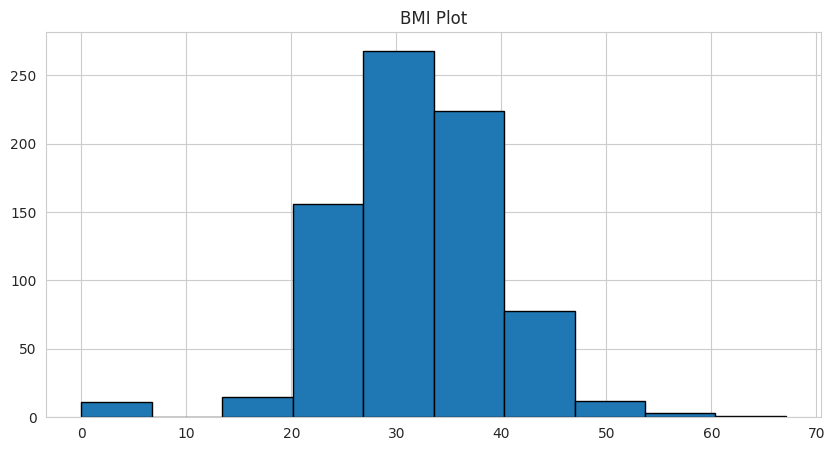

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure (figsize = (10,5))
plt.hist("BMI", data=df, edgecolor = "k")
plt.title("BMI Plot")
plt.show()

# Tag the plot with a number
display(HTML('<h2>Plot 4.12</h2>'))
display(plt.gcf().canvas)

##For Skin Thinkness

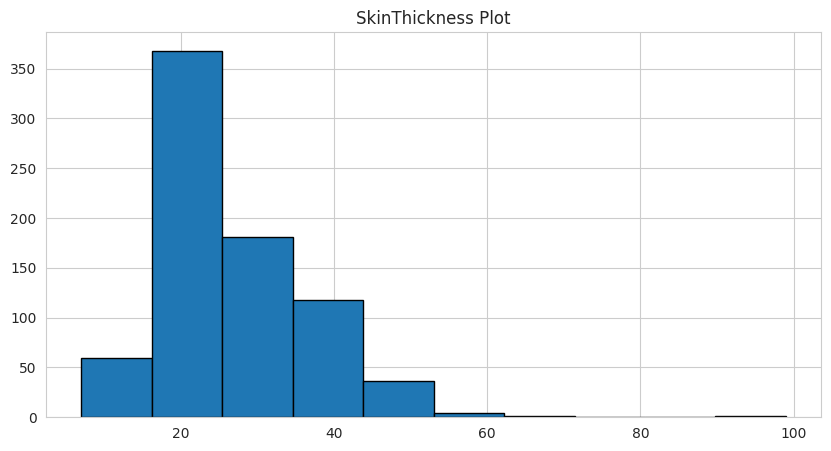

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure (figsize = (10,5))
plt.hist("SkinThickness", data=df, edgecolor = "k")
plt.title("SkinThickness Plot")
plt.show()

# Tag the plot with a number
display(HTML('<h2>Plot 4.13</h2>'))
display(plt.gcf().canvas)

##Checking Correlation between SkinThickness vs Insulin

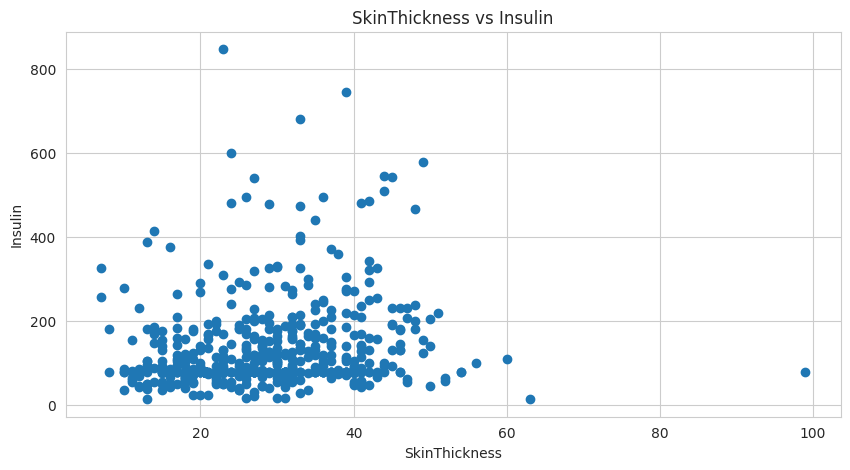

In [23]:
plt.figure(figsize= (10, 5))
plt.scatter("SkinThickness","Insulin", data =df)
plt.title("SkinThickness vs Insulin")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show

# Tag the plot with a number
display(HTML('<h2>Plot 4.14</h2>'))
display(plt.gcf().canvas)

###Checking Correlation between Pregnancies vs Insulin

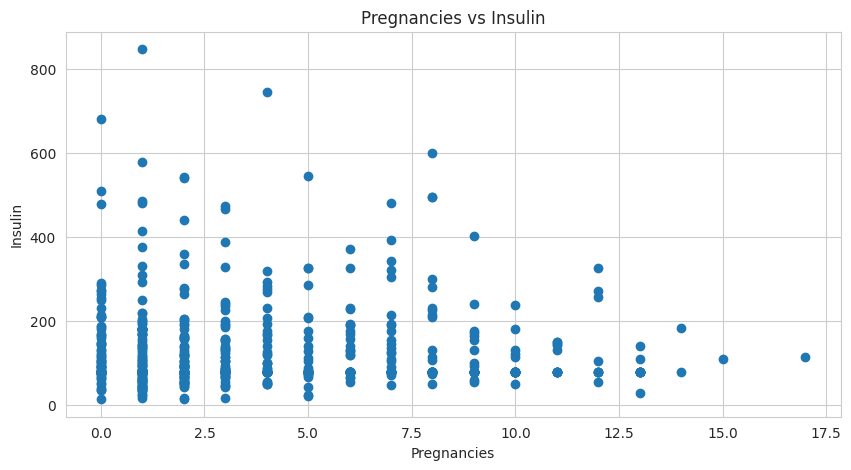

In [24]:
plt.figure (figsize= (10, 5))
plt.scatter("Pregnancies","Insulin", data =df)
plt.title("Pregnancies vs Insulin")
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show

# Tag the plot with a number
display(HTML('<h2>Plot 4.15</h2>'))
display(plt.gcf().canvas)

###Checking Correlation between BloodPressure vs Insulin

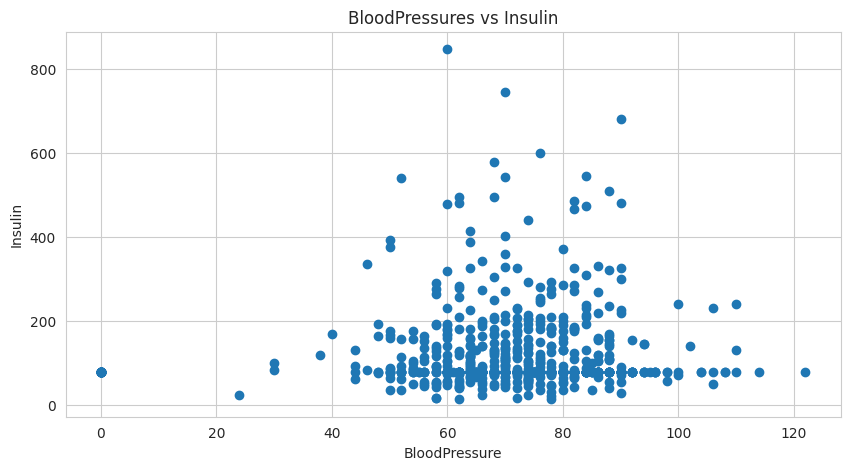

In [25]:
plt.figure (figsize= (10, 5))
plt.scatter("BloodPressure","Insulin", data =df)
plt.title("BloodPressures vs Insulin")
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show

# Tag the plot with a number
display(HTML('<h2>Plot 4.16</h2>'))
display(plt.gcf().canvas)

##Observation: From the plots above, (3.6) it shows that there are outliers, which decreases the credibility of the data and must be remove. For example, from the above plot of BloodPressure vs Insulin, it shows a blood pressure of zero, which is not naturally possible and against ground truth.

##Distribution Plot

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


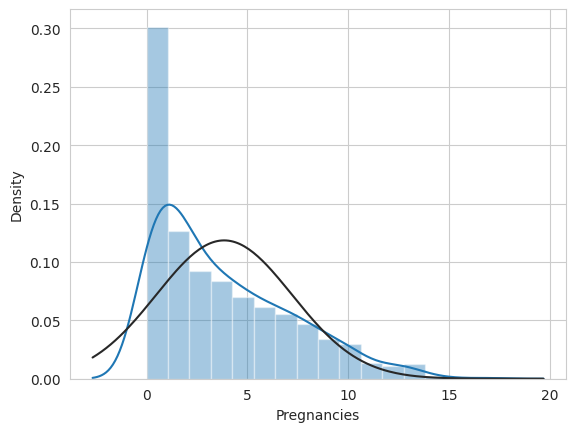

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


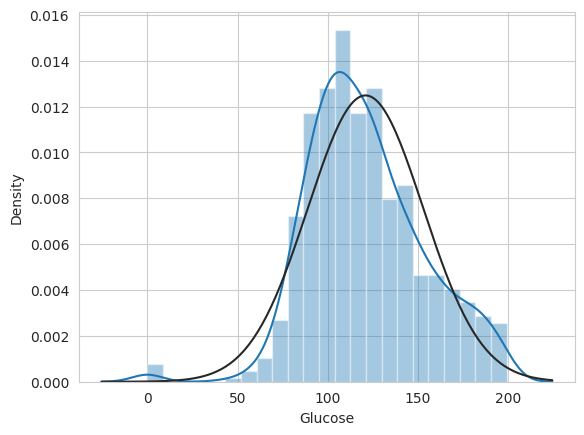

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


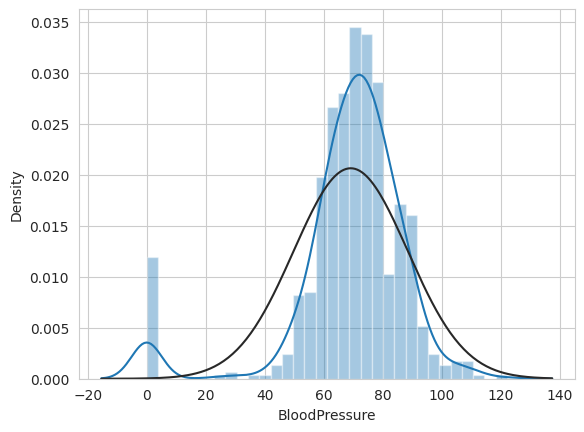

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


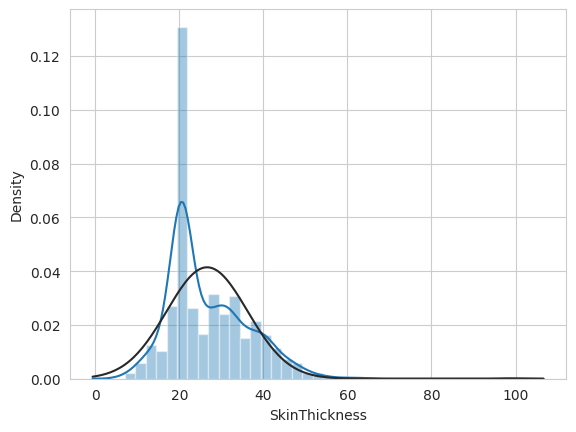

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


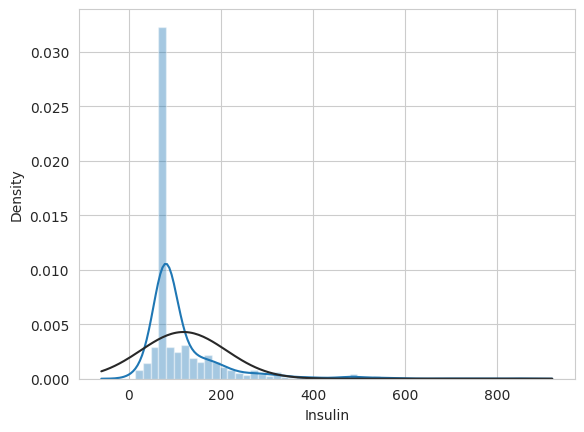

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


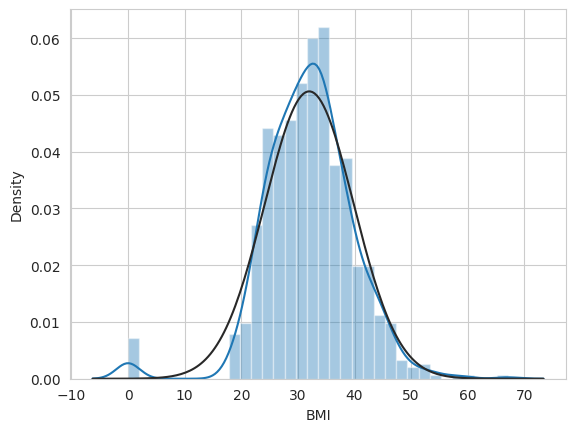

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


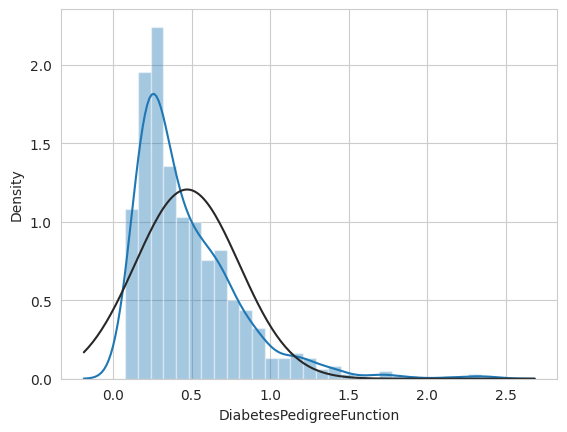

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


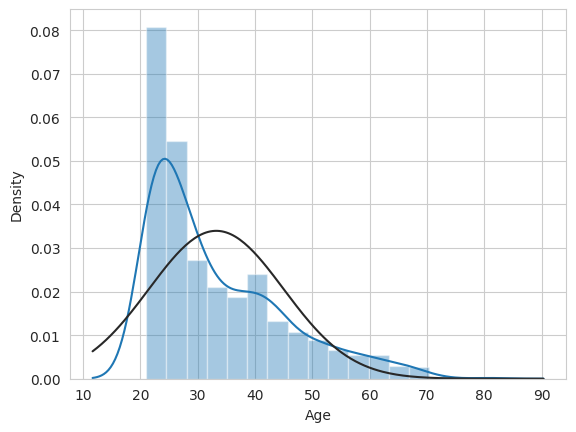

<ipython-input-26-57479ee3638b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


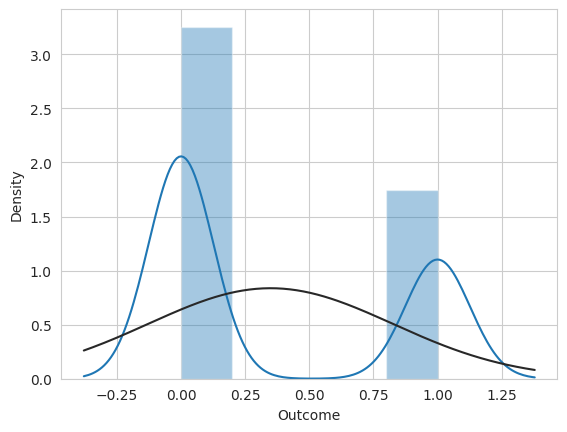

<Figure size 640x480 with 0 Axes>

In [26]:
from scipy import stats
from scipy.stats import norm, skew

for i in df.columns:
    plt.figure()
    sns.distplot(df[i], fit = norm)
    plt.show()

    # Tag the plot with a number
display(HTML('<h2>Plot 4.17 to 4.25</h2>'))
display(plt.gcf().canvas)

###Checking Correlation Coefficient in a Matrix Table

In [27]:
corr_matrix = df.corr()
df.corr()

Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14           0.01   
Glucose                          0.13     1.00           0.15           0.15   
BloodPressure                    0.14     0.15           1.00           0.18   
SkinThickness                    0.01     0.15           0.18           1.00   
Insulin                         -0.02     0.39           0.07           0.24   
BMI                              0.02     0.22           0.28           0.50   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.15   
Age                              0.54     0.26           0.24           0.03   
Outcome                          0.22     0.47           0.07           0.18   

                          Insulin  BMI  DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                 -0.02 0.02                     -0.03 0.54     0.22  
Glucose                      0.39 0.22                      0.14 0.26     0.47  
BloodPressure                0.07 0.28                      0.04 0.24     0.07  
SkinThickness                0.24 0.50                      0.15 0.03     0.18  
Insulin                      1.00 0.19                      0.16 0.04     0.18  
BMI                          0.19 1.00                      0.14 0.04     0.29  
DiabetesPedigreeFunction     0.16 0.14                      1.00 0.03     0.17  
Age                          0.04 0.04                      0.03 1.00     0.24  
Outcome                      0.18 0.29                      0.17 0.24     1.00

###Checking Correlation Coefficient via Heatmap

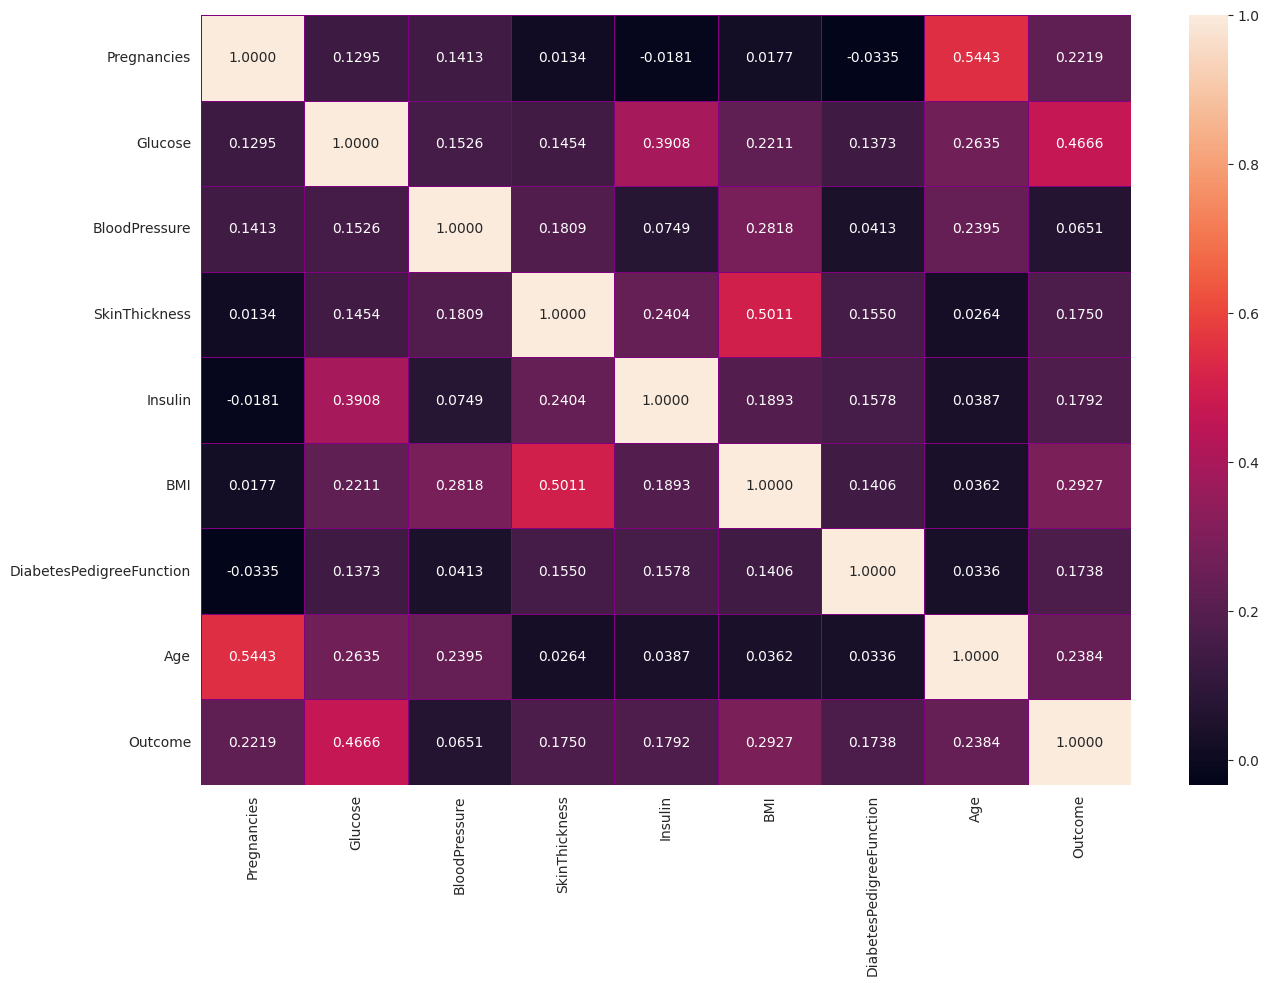

<Figure size 640x480 with 0 Axes>

In [28]:
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "purple", fmt = ".4f", ax = ax)
plt.show()

# Tag the plot with a number
display(HTML('<h2>Plot 4.26</h2>'))
display(plt.gcf().canvas)

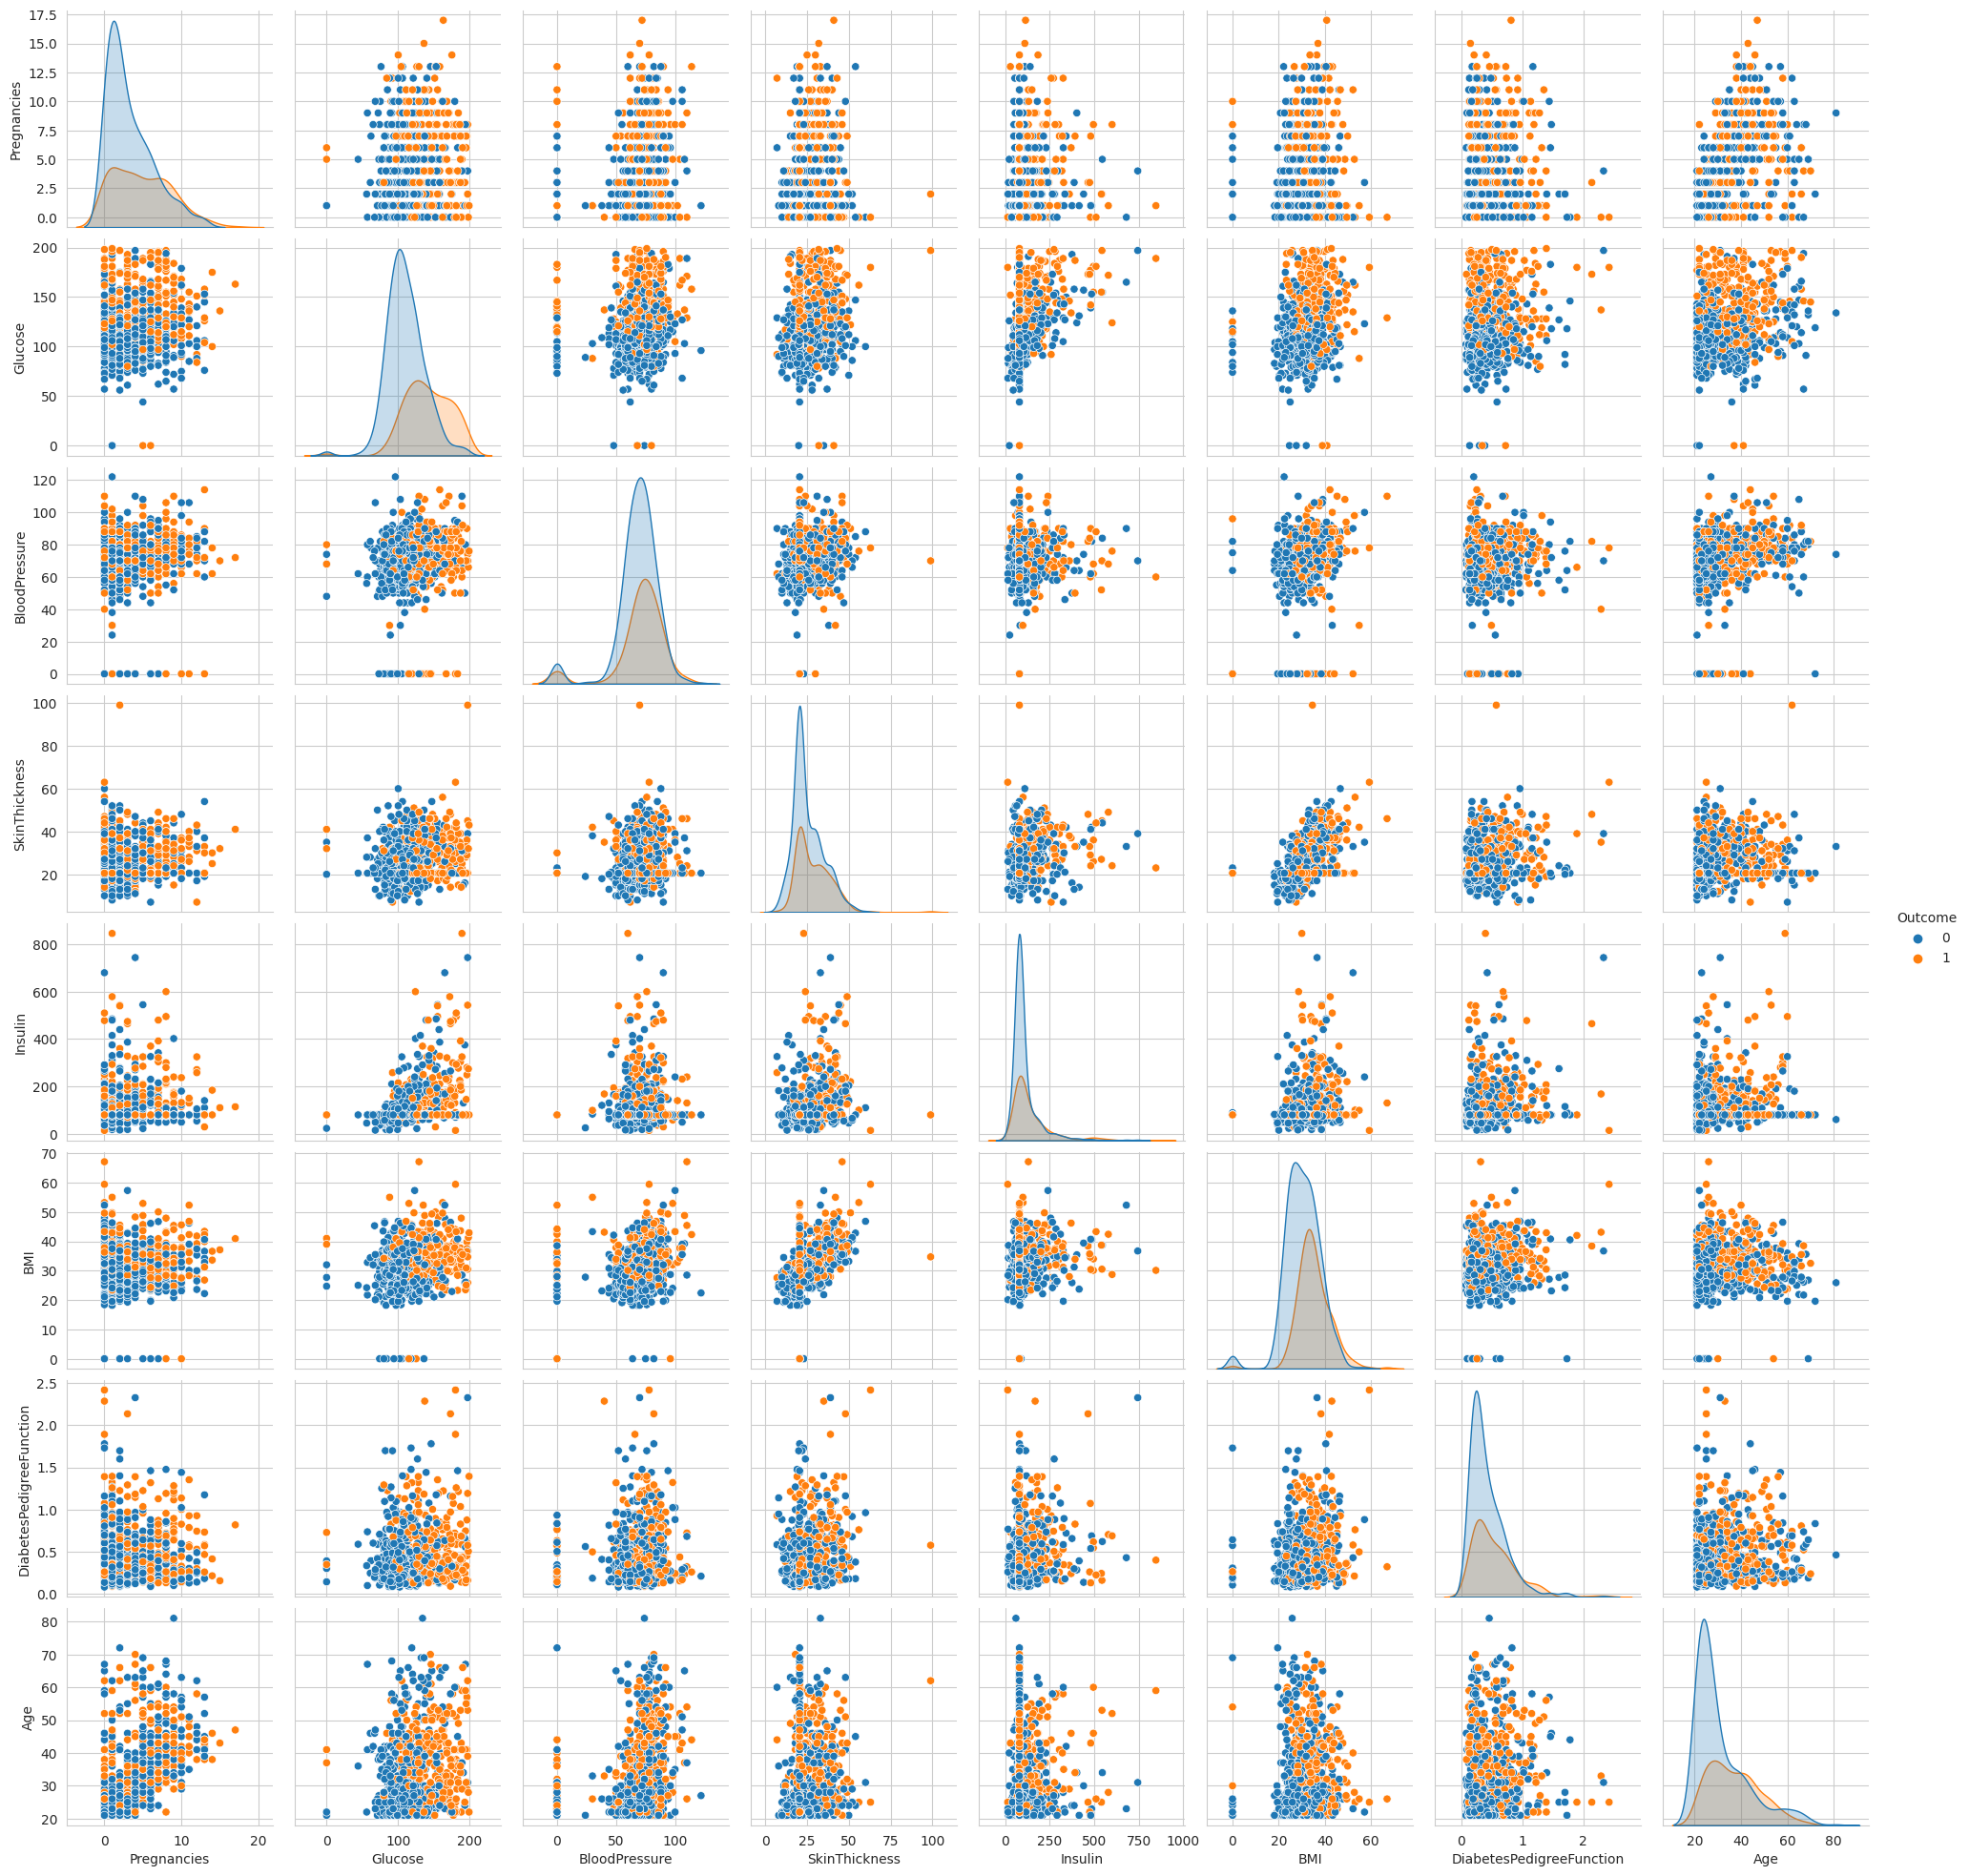

<Figure size 640x480 with 0 Axes>

In [29]:
#Show the Correlation relationship in plot format
sns.pairplot(df, hue = "Outcome")
plt.show()
# Tag the plot with a number
display(HTML('<h2>Plot 4.27</h2>'))
display(plt.gcf().canvas)

###To check the correlation of the output column (i.e., target variable = Outcome) against other columns

In [30]:
target = df['Outcome']
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
correlations = features.corrwith(target)
print(correlations)

Pregnancies                0.22
Glucose                    0.47
BloodPressure              0.07
SkinThickness              0.18
Insulin                    0.18
BMI                        0.29
DiabetesPedigreeFunction   0.17
Age                        0.24
dtype: float64


#5) Removing Outlayers

In [31]:
def remove_outlier (dataframe):
  # Calculate the first and third quartiles and the IQR
  for column_name in dataframe.columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3-Q1
    # Define the threshold for identifying outliers
    lower_limit = Q1 - 1.5*IQR
    Upper_limit = Q3 + 1.5*IQR
    # Identify the indices of the outliers
    print(f"{column_name} >> lower Limit: {lower_limit} \n upper Limit: {Upper_limit}")

    # Remove the outliers from the DataFrame
    dataframe = dataframe[(dataframe[column_name] > lower_limit)|(dataframe[column_name] < Upper_limit)]

  return dataframe


In [32]:
df = remove_outlier(df)

Pregnancies >> lower Limit: -6.5 
 upper Limit: 13.5
Glucose >> lower Limit: 37.125 
 upper Limit: 202.125
BloodPressure >> lower Limit: 35.0 
 upper Limit: 107.0
SkinThickness >> lower Limit: 3.341145833333332 
 upper Limit: 49.1953125
Insulin >> lower Limit: 8.623697916666671 
 upper Limit: 198.42578125
BMI >> lower Limit: 13.35 
 upper Limit: 50.550000000000004
DiabetesPedigreeFunction >> lower Limit: -0.32999999999999996 
 upper Limit: 1.2
Age >> lower Limit: -1.5 
 upper Limit: 66.5
Outcome >> lower Limit: -1.5 
 upper Limit: 2.5


In [33]:
df.shape

(768, 9)

In [34]:
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72          35.00    79.80 33.60   
1              1       85             66          29.00    79.80 26.60   
2              8      183             64          20.54    79.80 23.30   
3              1       89             66          23.00    94.00 28.10   
4              0      137             40          35.00   168.00 43.10   
5              5      116             74          20.54    79.80 25.60   
6              3       78             50          32.00    88.00 31.00   
7             10      115              0          20.54    79.80 35.30   
8              2      197             70          45.00   543.00 30.50   
9              8      125             96          20.54    79.80  0.00   
10             4      110             92          20.54    79.80 37.60   
11            10      168             74          20.54    79.80 38.00   
12            10      139             80          20.54    79.80 27.10   
13             1      189             60          23.00   846.00 30.10   
14             5      166             72          19.00   175.00 25.80   
15             7      100              0          20.54    79.80 30.00   
16             0      118             84          47.00   230.00 45.80   
17             7      107             74          20.54    79.80 29.60   
18             1      103             30          38.00    83.00 43.30   
19             1      115             70          30.00    96.00 34.60   
20             3      126             88          41.00   235.00 39.30   
21             8       99             84          20.54    79.80 35.40   
22             7      196             90          20.54    79.80 39.80   
23             9      119             80          35.00    79.80 29.00   
24            11      143             94          33.00   146.00 36.60   
25            10      125             70          26.00   115.00 31.10   
26             7      147             76          20.54    79.80 39.40   
27             1       97             66          15.00   140.00 23.20   
28            13      145             82          19.00   110.00 22.20   
29             5      117             92          20.54    79.80 34.10   
30             5      109             75          26.00    79.80 36.00   
31             3      158             76          36.00   245.00 31.60   
32             3       88             58          11.00    54.00 24.80   
33             6       92             92          20.54    79.80 19.90   
34            10      122             78          31.00    79.80 27.60   
35             4      103             60          33.00   192.00 24.00   
36            11      138             76          20.54    79.80 33.20   
37             9      102             76          37.00    79.80 32.90   
38             2       90             68          42.00    79.80 38.20   
39             4      111             72          47.00   207.00 37.10   
40             3      180             64          25.00    70.00 34.00   
41             7      133             84          20.54    79.80 40.20   
42             7      106             92          18.00    79.80 22.70   
43             9      171            110          24.00   240.00 45.40   
44             7      159             64          20.54    79.80 27.40   
45             0      180             66          39.00    79.80 42.00   
46             1      146             56          20.54    79.80 29.70   
47             2       71             70          27.00    79.80 28.00   
48             7      103             66          32.00    79.80 39.10   
49             7      105              0          20.54    79.80  0.00   
50             1      103             80          11.00    82.00 19.40   
51             1      101             50          15.00    36.00 24.20   
52             5       88             66          21.00    23.00 24.40   
53       

###Observation (2) AFter the IQR cleanings technique have been applied,no reduction in rows was observed.This happened as the outliers are located at the boundaries of the distribution of the data or/and are evenly distributed throughout the data. A quick check shows same outliers in Bloodpressure Vs insulin as shown in plot 4.1 below:

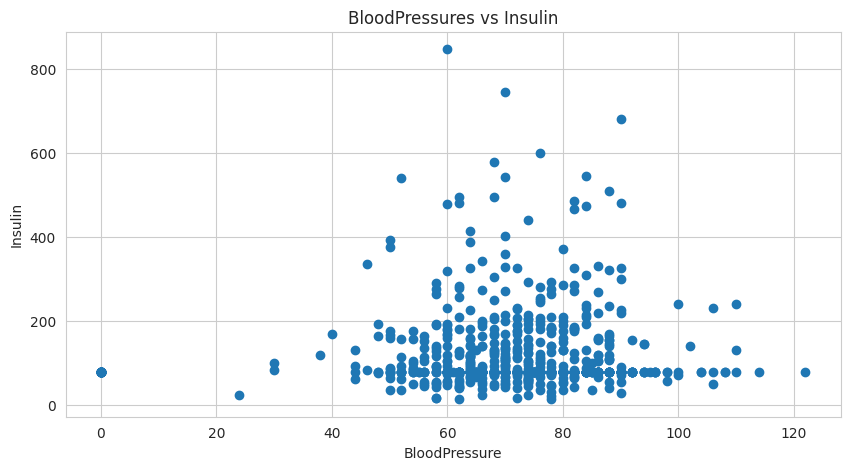

In [35]:
#Plotting a scatter Plot 
plt.figure (figsize= (10, 5))
plt.scatter("BloodPressure","Insulin", data =df)
plt.title("BloodPressures vs Insulin")
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show

# Tag the plot with a number
display(HTML('<h2>Plot 5.1</h2>'))
display(plt.gcf().canvas)

#6)Data Trainning

##6.1)Define values of X and y

In [36]:
#Check the independent variable data type
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [37]:
#Assigning all independent variables to X and converting to Numpy Array
X = df.drop(["Outcome"], axis = 1).values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [38]:
X.dtype

dtype('float64')

###Performing z-score (standardisation) for all the elements of the input array, X.

In [39]:
from scipy.stats import zscore
X=stats.zscore(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

###Defining y Value

In [40]:
#Define y and convert values to numpy array
y=df['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

###Confirming the Distinct values of the Outcome (Target) column 

In [41]:
#Checking the distinct values of Column Outcome
print (df['Outcome'].unique())

[1 0]


In [42]:
#Check number of occurance 
distinct_count = df['Outcome'].nunique()
distinct_count

2

In [43]:
#Checking the individual count of unique values
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

###6.2)Train Spliting Application

In [44]:
#APPLYING THE TRAINING TEST PARAMETERS from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify =y,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


In [45]:
#Check and show the shape of X and y
print (X.shape,X_test.shape,X_train.shape)
print (y.shape,y_test.shape,y_train.shape)

(768, 8) (154, 8) (614, 8)
(768,) (154,) (614,)


In [46]:
#Observing X-train value
X_train

array([[-0.84488505, -0.96691063, -0.36733675, ..., -0.6082704 ,
         0.3265464 , -0.78628618],
       [ 0.3429808 ,  0.1597866 ,  0.45982725, ..., -0.30366421,
        -0.09929033,  0.57511787],
       [-0.54791859, -0.49745345, -0.57412775, ...,  0.36900779,
        -0.74559573, -0.70119842],
       ...,
       [-0.84488505, -0.74783062,  0.04624525, ...,  0.77514938,
        -0.76673656, -0.27575966],
       [ 1.82781311, -0.30967058,  0.04624525, ..., -0.57019463,
        -0.9992857 ,  0.57511787],
       [ 0.04601433,  0.72313521, -0.57412775, ..., -0.31635613,
        -0.55834837,  0.31985461]])

In [47]:
#Observing the first five y-train values 
y_train[0:5]

array([0, 0, 0, 0, 0])

#7)Logistic Regression Process

In [48]:
#import LogisticRegression library
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

In [49]:
logReg.fit(X_train, y_train)

LogisticRegression()

##7.1) Results

In [88]:
#Checking the score of the model
logReg.score(X_test,y_test)

0.9694444444444444

In [71]:
# Assume X_train and y_train are the training data and labels, respectively
# Assume X_test has 64 features and you want to use all 64 features
# Retrain the model using all 64 features
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

# Predict the labels using the model and the test data with 64 features
y_pred = logReg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
accuracy = logReg.score(X_test, y_test)
print("LR_Accuracy:", accuracy)

LR_Accuracy: 0.9694444444444444


In [51]:
#Checking for more details about my model
from sklearn.metrics import confusion_matrix, classification_report
predictions = logReg.predict(X_test)

In [52]:
#Show the Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm


array([[81, 19],
       [26, 28]])

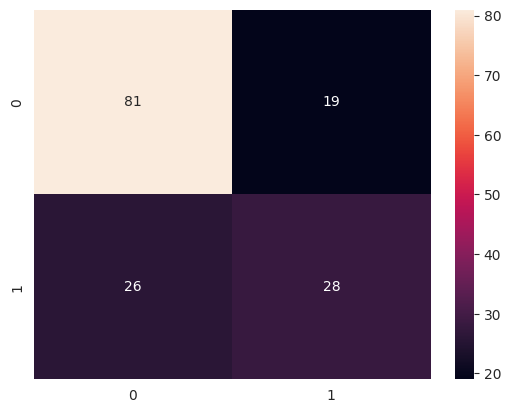

In [53]:
#Vitualizing the confusion Matrix
sns.heatmap(cm, annot = True)

# Tag the plot with a number
display(HTML('<h2>Plot 7.1</h2>'))
display(plt.gcf().canvas)

In [54]:
#Showing the Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



# #8) **Support Vector Machines (SVM)**

##8.1) Model Evaluation

In [87]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM model
svm_model = SVC(kernel='linear')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print("SVM_Accuracy:", acc_score)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)


SVM_Accuracy: 0.9777777777777777
Confusion matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


##8.1) Model Vistualization

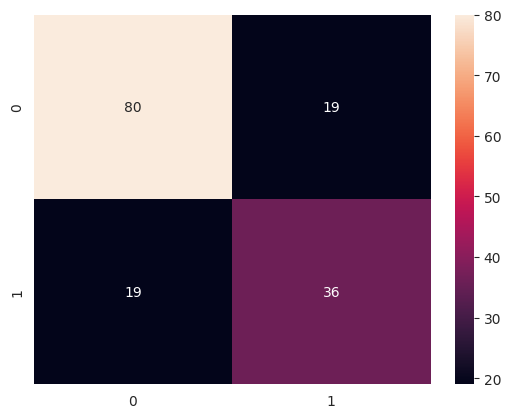

In [56]:
#Vitualizing the confusion Matrix
sns.heatmap(conf_matrix, annot = True)

# Tag the plot with a number
display(HTML('<h2>Plot 8.1</h2>'))
display(plt.gcf().canvas)

#9) **Random Forest Prediction System**

RF_Accuracy: 0.9722222222222222
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


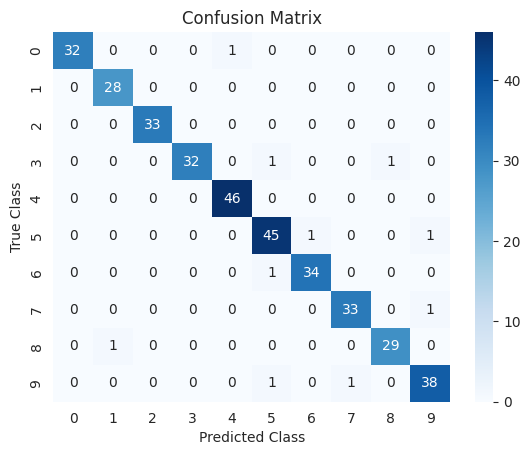

In [76]:
# Importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the model performance using accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("RF_Accuracy:", accuracy)
print(f"Confusion Matrix:\n{conf_matrix}")
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

##9.1) Accuracy Vistualization

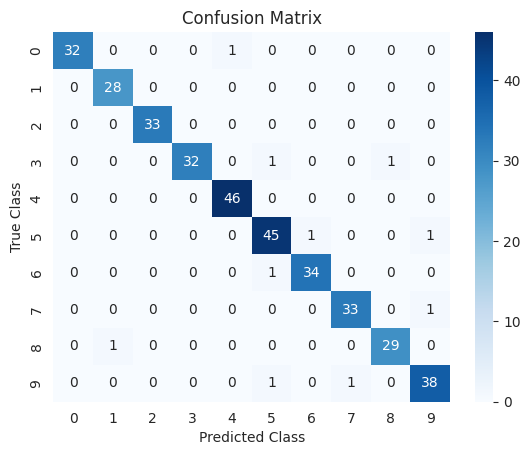

<Figure size 640x480 with 0 Axes>

In [85]:
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

# Tag the plot with a number
display(HTML('<h2>Plot 9.1</h2>'))
display(plt.gcf().canvas)

#10)**Predicting the Output (Out Come) Using Decision Tree**

##10.1) Fitting and Accuracy check

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("DT_Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


DT_Accuracy: 0.8416666666666667
Confusion matrix:
 [[29  0  0  0  2  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 0  0 24  3  1  1  1  1  2  0]
 [ 0  0  1 29  0  1  0  1  1  1]
 [ 0  0  1  0 42  0  0  2  1  0]
 [ 0  0  1  0  1 40  0  0  1  4]
 [ 1  0  0  0  1  1 32  0  0  0]
 [ 0  0  0  2  1  0  0 31  0  0]
 [ 0  3  0  1  0  1  0  0 21  4]
 [ 0  1  0  3  1  0  0  2  0 33]]


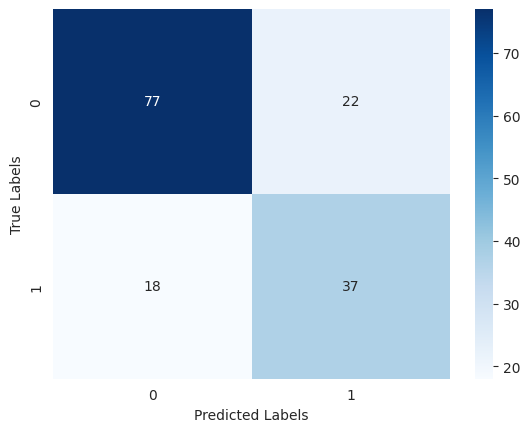

In [60]:
# Get the predicted labels of the test set using the decision tree classifier
y_pred = clf.predict(X_test)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#11) Results

##Show All model F1 Score

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [100]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and make predictions using the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)
lr_f1_score = f1_score(y_test, lr_y_pred, average='weighted')

# Train and make predictions using the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_y_pred = dt_model.predict(X_test_scaled)
dt_f1_score = f1_score(y_test, dt_y_pred, average='weighted')

# Train and make predictions using the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_f1_score = f1_score(y_test, rf_y_pred, average='weighted')

# Train and make predictions using the SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
svm_f1_score = f1_score(y_test, svm_y_pred, average='weighted')

# Print the F1 score for each model
print('Logistic Regression F1 score:', lr_f1_score)
print('Decision Tree F1 score:', dt_f1_score)
print('Random Forest F1 score:', rf_f1_score)
print('SVM F1 score:', svm_f1_score)


Logistic Regression F1 score: 0.9722963303758159
Decision Tree F1 score: 0.8610411687493708
Random Forest F1 score: 0.969386824897056
SVM F1 score: 0.9805204312897433


LR F1 score:  97.23%
DT F1 score:  86.10%
RF F1 score:  96.94%
SVM F1 score:  98.05%


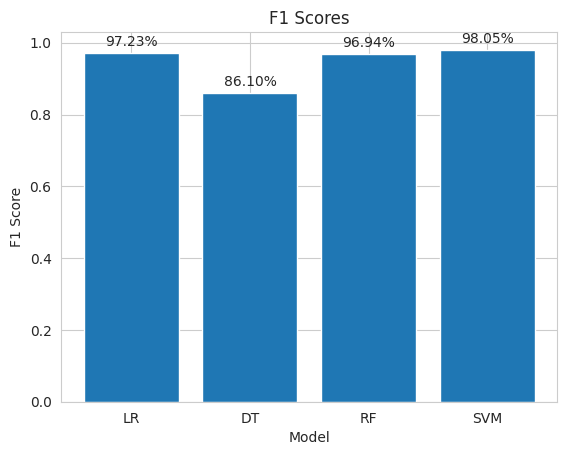

In [106]:
import matplotlib.pyplot as plt

# Define the F1 scores
LR_F1_score = 0.9722963303758159
DT_F1_score = 0.8610411687493708
RF_F1_score = 0.969386824897056
SVM_F1_score = 0.9805204312897433

# Convert the F1 scores to percentages
LR_F1_score_pct = "{:.2%}".format(LR_F1_score)
DT_F1_score_pct = "{:.2%}".format(DT_F1_score)
RF_F1_score_pct = "{:.2%}".format(RF_F1_score)
SVM_F1_score_pct = "{:.2%}".format(SVM_F1_score)

# Print the F1 scores as percentages
print("LR F1 score: ", LR_F1_score_pct)
print("DT F1 score: ", DT_F1_score_pct)
print("RF F1 score: ", RF_F1_score_pct)
print("SVM F1 score: ", SVM_F1_score_pct)

# Define the labels and values for the x and y axes
labels = ['LR', 'DT', 'RF', 'SVM']
values = [LR_F1_score, DT_F1_score, RF_F1_score, SVM_F1_score]

# Create the bar plot
fig, ax = plt.subplots()
rects = ax.bar(labels, values)

# Set the plot title and axis labels
plt.title('F1 Scores')
plt.xlabel('Model')
plt.ylabel('F1 Score')

# Add the percentage values to the bars
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.annotate("{:.2%}".format(values[i]),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


##Show All Model Accuracy Score

In [91]:
# Define the accuracy values
LR_Accuracy = 0.969
SVM_Accuracy = 0.977
DT_Accuracy = 0.842
RF_Accuracy = 0.972

# Convert the accuracy values to percentages
LR_Accuracy_pct = "{:.2%}".format(LR_Accuracy)
SVM_Accuracy_pct = "{:.2%}".format(SVM_Accuracy)
DT_Accuracy_pct = "{:.2%}".format(DT_Accuracy)
RF_Accuracy_pct = "{:.2%}".format(RF_Accuracy)

# Print the accuracy values as percentages
print("LR Accuracy: ", LR_Accuracy_pct)
print("SVM Accuracy: ", SVM_Accuracy_pct)
print("DT Accuracy: ", DT_Accuracy_pct)
print("RF Accuracy: ", RF_Accuracy_pct)

LR Accuracy:  96.90%
SVM Accuracy:  97.70%
DT Accuracy:  84.20%
RF Accuracy:  97.20%


LR Accuracy: 96.90%
SVM Accuracy: 97.70%
DT Accuracy: 84.20%
RF Accuracy: 97.20%


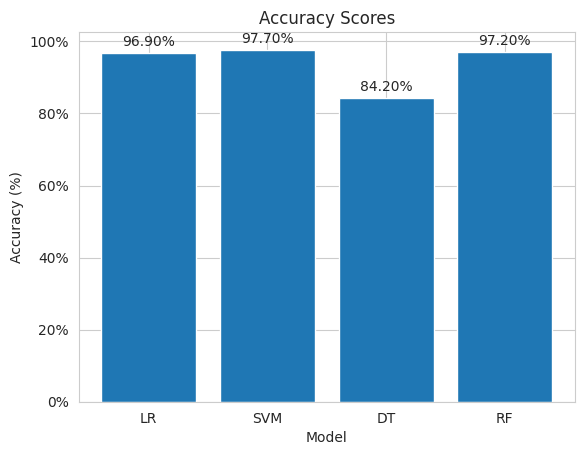

In [107]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define the accuracy values
LR_Accuracy = 0.969
SVM_Accuracy = 0.977
DT_Accuracy = 0.842
RF_Accuracy = 0.972

# Convert the accuracy values to percentages
LR_Accuracy_pct = LR_Accuracy * 100
SVM_Accuracy_pct = SVM_Accuracy * 100
DT_Accuracy_pct = DT_Accuracy * 100
RF_Accuracy_pct = RF_Accuracy * 100

# Print the accuracy values as percentages
print("LR Accuracy: {:.2f}%".format(LR_Accuracy_pct))
print("SVM Accuracy: {:.2f}%".format(SVM_Accuracy_pct))
print("DT Accuracy: {:.2f}%".format(DT_Accuracy_pct))
print("RF Accuracy: {:.2f}%".format(RF_Accuracy_pct))

# Define the labels and values for the x and y axes
labels = ['LR', 'SVM', 'DT', 'RF']
values = [LR_Accuracy_pct, SVM_Accuracy_pct, DT_Accuracy_pct, RF_Accuracy_pct]

# Create the bar plot
fig, ax = plt.subplots()
rects = ax.bar(labels, values)

# Set the plot title and axis labels
ax.set_title('Accuracy Scores')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')

# Format the y-axis tick labels as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add the percentage values on top of each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}%'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.show()
